# b. Identify major markets for the district “Agra” and plot price patterns for each of them. What patterns do you identify? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from datetime import datetime
from datetime import date

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
# Lets read the datset... Here dataset is in the html form that's y pd.rea_html()is used..

data = pd.read_csv('Agmarknet_Price.csv')
data

,Unnamed: 0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1826,1827,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-01
1,305,306,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,2020-01-01
2,1325,1326,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,2020-01-01
3,1658,1659,Agra,Khairagarh,Potato,Desi,FAQ,1200,1300,1250,2020-01-01
4,1138,1139,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
1822,1472,1473,Agra,Khairagarh,Potato,Desi,FAQ,1100,1200,1150,2020-12-31
1823,591,592,Agra,Fatehabad,Potato,Desi,FAQ,700,800,750,2020-12-31
1824,306,307,Agra,Agra,Potato,Desi,FAQ,800,1100,960,2020-12-31
1825,849,850,Agra,Fatehpur Sikri,Potato,Local,FAQ,900,1100,1015,2020-12-31


In [3]:
newdata=data.drop(['District Name','Commodity','Variety','Grade','Sl no.','Unnamed: 0'],axis=1)
newdata

,Market Name,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Samsabad,1100,1300,1200,2020-01-01
1,Achnera,1300,1400,1350,2020-01-01
2,Jagnair,1250,1350,1300,2020-01-01
3,Khairagarh,1200,1300,1250,2020-01-01
4,Fatehpur Sikri,1400,1520,1455,2020-01-01
...,...,...,...,...,...
1822,Khairagarh,1100,1200,1150,2020-12-31
1823,Fatehabad,700,800,750,2020-12-31
1824,Agra,800,1100,960,2020-12-31
1825,Fatehpur Sikri,900,1100,1015,2020-12-31


In [4]:
newdata.head(5) # Lets check the head of the dataset

,Market Name,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Samsabad,1100,1300,1200,2020-01-01
1,Achnera,1300,1400,1350,2020-01-01
2,Jagnair,1250,1350,1300,2020-01-01
3,Khairagarh,1200,1300,1250,2020-01-01
4,Fatehpur Sikri,1400,1520,1455,2020-01-01


In [5]:
newdata.tail(5)#Last 5 rows

,Market Name,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1822,Khairagarh,1100,1200,1150,2020-12-31
1823,Fatehabad,700,800,750,2020-12-31
1824,Agra,800,1100,960,2020-12-31
1825,Fatehpur Sikri,900,1100,1015,2020-12-31
1826,Jagnair,750,850,800,2020-12-31


In [6]:
print('This are the major markets for the district “Agra” ')
print('Markets :-')
for market in data['Market Name'].unique():
    print("          "+market)

This are the major markets for the district “Agra” 
Markets :-
          Samsabad
          Achnera
          Jagnair
          Khairagarh
          Fatehpur Sikri
          Jarar
          Agra
          Fatehabad


In [7]:
#Lets see the shape of the dataset 

print("Shape of the dataset : ",data.shape)

Shape of the dataset :  (1827, 11)


In [8]:
newdata.shape

(1827, 5)

In [9]:
newdata.isnull().sum()

Market Name                  0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64

In [10]:
t=[]
for i in range(len(newdata['Price Date'])):
    t.append(datetime.strptime(newdata['Price Date'][i], '%Y-%m-%d'))
    t[i]=t[i].isoformat()

 #test = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d').date()   
newdata['Price Date']=t
newdata.set_index("Price Date", inplace = True)



In [11]:
newdata=newdata.groupby('Market Name')

In [12]:
def fill(h):
  h=h.sort_values('Price Date')
  h.index = pd.DatetimeIndex(h.index)
  h = h.reindex(id, fill_value=None)
  h=h.fillna(method ='pad')
  h=h.fillna(method='bfill')
  return h



In [13]:
id = pd.date_range('2020-01-01','2020-12-31')

Agra=newdata.get_group('Agra')
Achnera=newdata.get_group('Achnera')
Fatehabad=newdata.get_group('Fatehabad')
Fatehpur_Sikri=newdata.get_group('Fatehpur Sikri')
Jagnair=newdata.get_group('Jagnair')
Jarar=newdata.get_group('Jarar')
Khairagarh=newdata.get_group('Khairagarh')
Samsabad=newdata.get_group('Samsabad')


Agra=fill(Agra)
Achnera=fill(Achnera)
Fatehabad=fill(Fatehabad)
Fatehpur_Sikri=fill(Fatehpur_Sikri)
Jagnair=fill(Jagnair)
Jarar=fill(Jarar)
Khairagarh=fill(Khairagarh)
Samsabad=fill(Samsabad)

Achnera

,Market Name,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
2020-01-01,Achnera,1300.0,1400.0,1350.0
2020-01-02,Achnera,1300.0,1400.0,1350.0
2020-01-03,Achnera,1300.0,1400.0,1350.0
2020-01-04,Achnera,1250.0,1350.0,1300.0
2020-01-05,Achnera,1280.0,1360.0,1320.0
...,...,...,...,...
2020-12-27,Achnera,800.0,900.0,850.0
2020-12-28,Achnera,850.0,950.0,900.0
2020-12-29,Achnera,800.0,900.0,850.0
2020-12-30,Achnera,900.0,1000.0,950.0


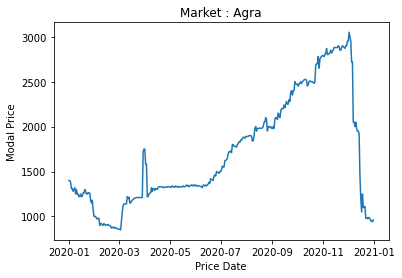

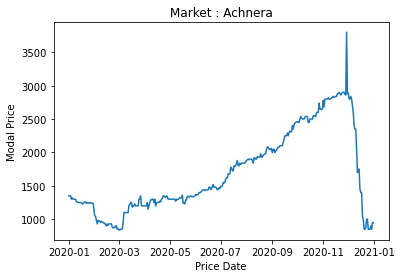

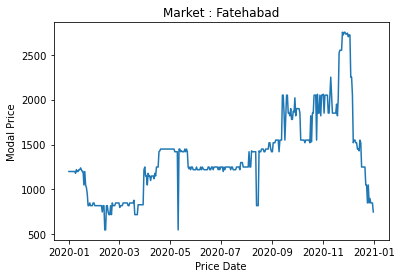

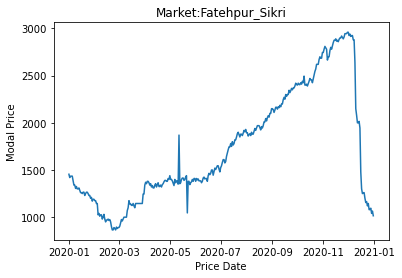

In [14]:
# Now we will see the marketwise pattern of prices over the year

plt.xlabel('Price Date')
plt.ylabel('Modal Price')
plot=plt.plot(Agra['Modal Price (Rs./Quintal)'])
plt.title('Market : Agra')
plt.show()

plt.xlabel('Price Date')
plt.ylabel('Modal Price')
plot=plt.plot(Achnera['Modal Price (Rs./Quintal)'])
plt.title('Market : Achnera')
plt.show()


plt.xlabel('Price Date')
plt.ylabel('Modal Price')
plt.plot(Fatehabad['Modal Price (Rs./Quintal)'])
plt.title('Market : Fatehabad')
plt.show()


plt.xlabel('Price Date')
plt.ylabel('Modal Price')
plt.plot(Fatehpur_Sikri['Modal Price (Rs./Quintal)'])
plt.title('Market:Fatehpur_Sikri')
plt.show()



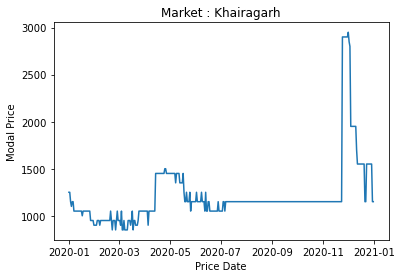

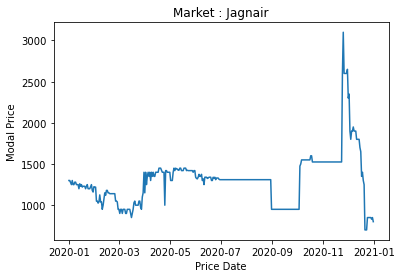

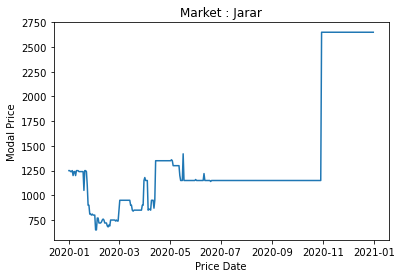

In [15]:
plt.xlabel('Price Date')
plt.ylabel('Modal Price')
plt.plot(Khairagarh['Modal Price (Rs./Quintal)'])
plt.title('Market : Khairagarh')
plt.show()

plt.xlabel('Price Date')
plt.ylabel('Modal Price')
plt.plot(Jagnair['Modal Price (Rs./Quintal)'])
plt.title('Market : Jagnair')
plt.show()

plt.xlabel('Price Date')
plt.ylabel('Modal Price')
plt.plot(Jarar['Modal Price (Rs./Quintal)'])
plt.title('Market : Jarar')
plt.show()

